# K-means y hierarchical clustering


In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head(10)

,ClienteID,Genero,Edad,Ingresos anuales(k$),Puntaje_gasto(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
# Este comando permite observar las filas y columnas disponibles.
dataset.shape

(200, 5)

In [4]:
data=dataset.drop(['Genero'], axis=1)

In [5]:
data.head()

,ClienteID,Edad,Ingresos anuales(k$),Puntaje_gasto(1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [6]:
data.describe()

,ClienteID,Edad,Ingresos anuales(k$),Puntaje_gasto(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.isna().sum()

ClienteID               0
Edad                    0
Ingresos anuales(k$)    0
Puntaje_gasto(1-100)    0
dtype: int64

In [8]:
# elimina todas las filas que contienen al menos un valor nulo en cualquier columna.
data.dropna()

,ClienteID,Edad,Ingresos anuales(k$),Puntaje_gasto(1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


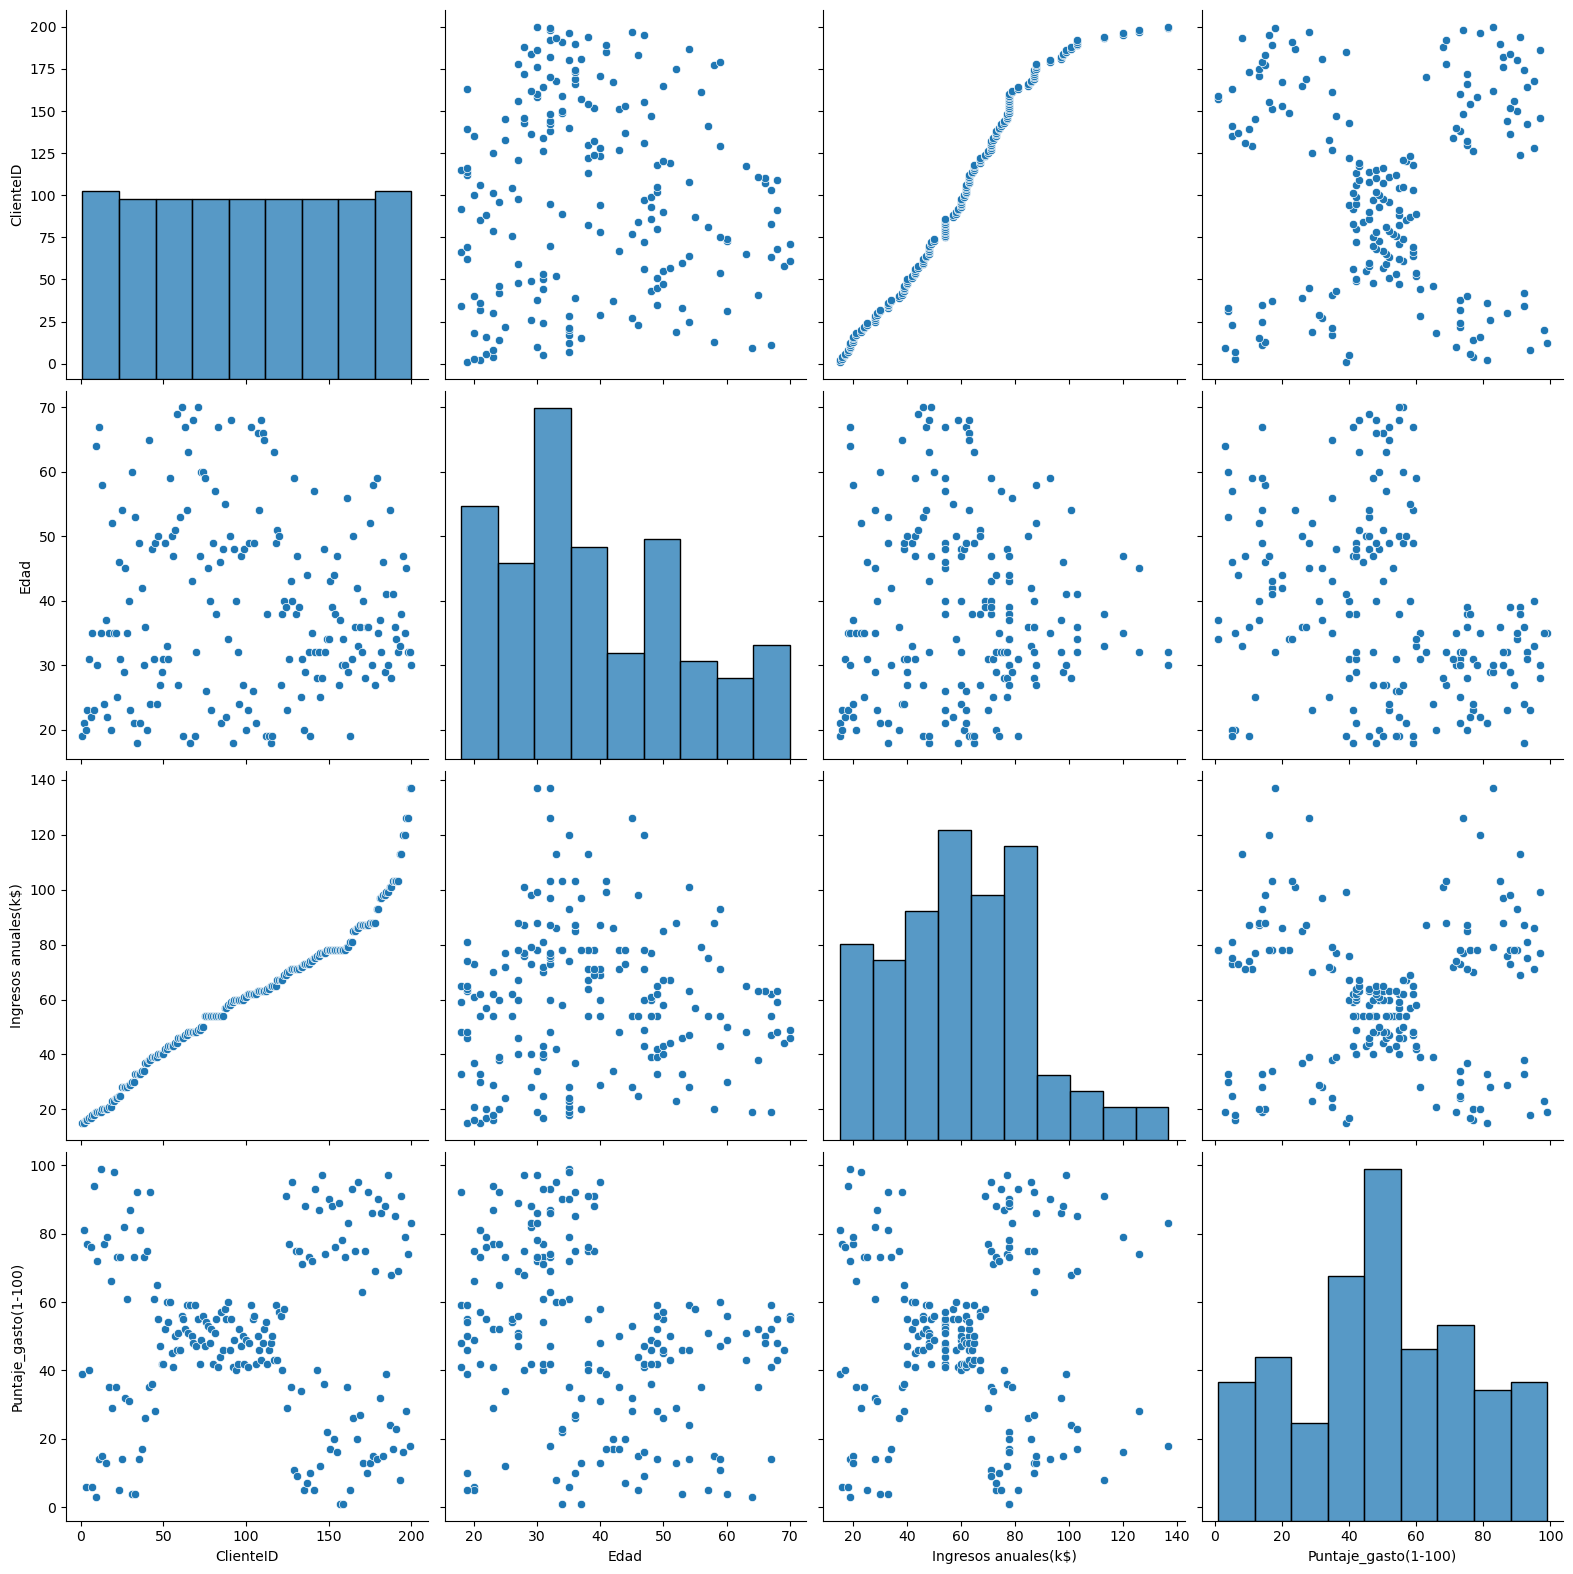

In [18]:
# Visualizar las relaciones entre las variables en un DataFrame al trazar todas las combinaciones posibles de variables en un solo gráfico.
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [19]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,ClienteID,Edad,Ingresos anuales(k$),Puntaje_gasto(1-100)
ClienteID,1.000000,-0.026763,0.977548,0.013835
Edad,-0.026763,1.000000,-0.012398,-0.327227
Ingresos anuales(k$),0.977548,-0.012398,1.000000,0.009903
Puntaje_gasto(1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

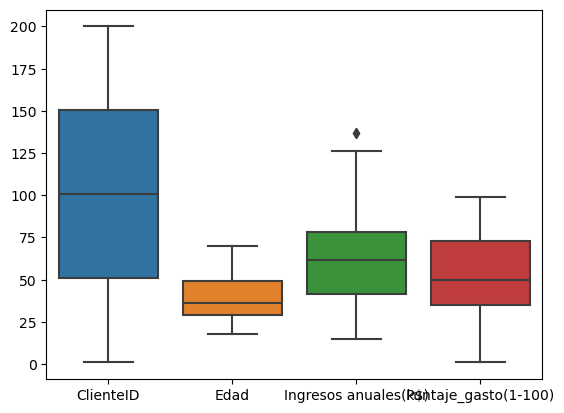

In [20]:
# Diagramas de caja para cada variable por especie
sns.boxplot(data=data)

In [21]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,ClienteID,Edad,Ingresos anuales(k$),Puntaje_gasto(1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


# K-MEANS

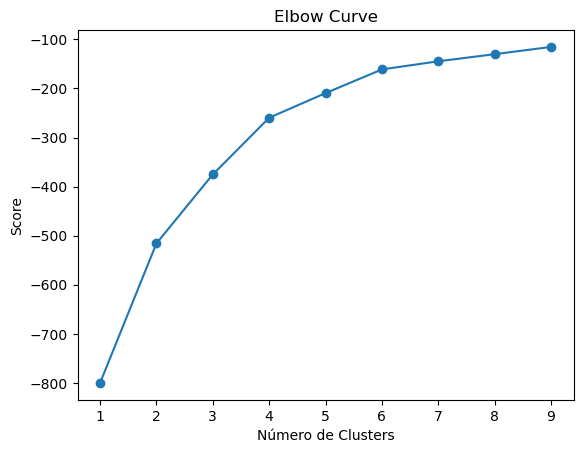

In [22]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [24]:
# Seleccionar las columnas relevantes para el agrupamiento
X = data[['Edad', 'Ingresos anuales(k$)', 'Puntaje_gasto(1-100)']]
# Aplicar k-means con 5 clusters
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[43.08860759, 55.29113924, 49.56962025],
       [32.69230769, 86.53846154, 82.12820513],
       [25.52173913, 26.30434783, 78.56521739],
       [45.2173913 , 26.30434783, 20.91304348],
       [40.66666667, 87.75      , 17.58333333]])

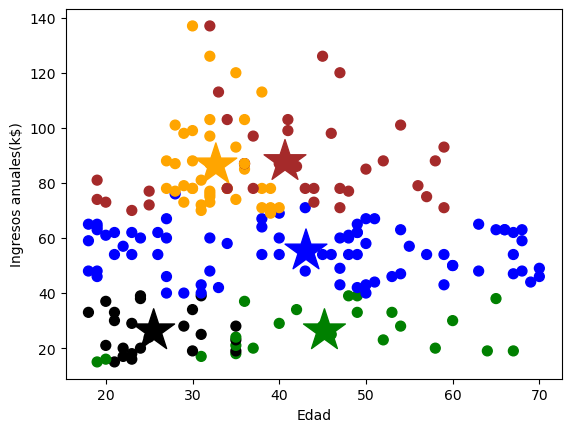

In [28]:
# Suponiendo que tienes tus datos en X y ya has aplicado k-means

# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
# Definimos los colores para cada cluster
colores = ['blue', 'orange', 'black', 'green', 'brown']
# Creamos una lista de colores asignados a cada punto según su cluster
asignar = [colores[label] for label in labels]
# Graficamos los puntos de los datos
plt.scatter(X['Edad'], X['Ingresos anuales(k$)'], c=asignar, s=50)
# Graficamos los centroides de los clusters
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
# Etiquetamos los ejes
plt.xlabel('Edad')
plt.ylabel('Ingresos anuales(k$)')
# Mostramos el gráfico
plt.show()

In [36]:
# Ajustar los nuevos datos para que tengan el mismo formato que los datos originales
X_new = pd.DataFrame({'Edad': [5.4], 'Ingresos anuales(k$)': [3.3], 'Puntaje_gasto(1-100)': [0.25]})

# Predecir las etiquetas de los nuevos datos utilizando el modelo de KMeans
new_label = kmeans.predict(X_new)

# Asignar colores a las etiquetas predichas
color = [colores[label] for label in new_label]

# Mostrar las etiquetas predichas y los colores asignados
print("Etiqueta predicha para los nuevos datos:", new_label)
print("Colores asignados para los nuevos datos:", color)

Etiqueta predicha para los nuevos datos: [3]
Colores asignados para los nuevos datos: ['green']


In [38]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.44428597560893024
Índice de Calinski-Harabasz: 151.04386000160667
Inertia (suma de cuadrados dentro de los clusters): 75350.77917248776
Davies-Bouldin Index: 0.8218781633199779


# hierarchical clustering

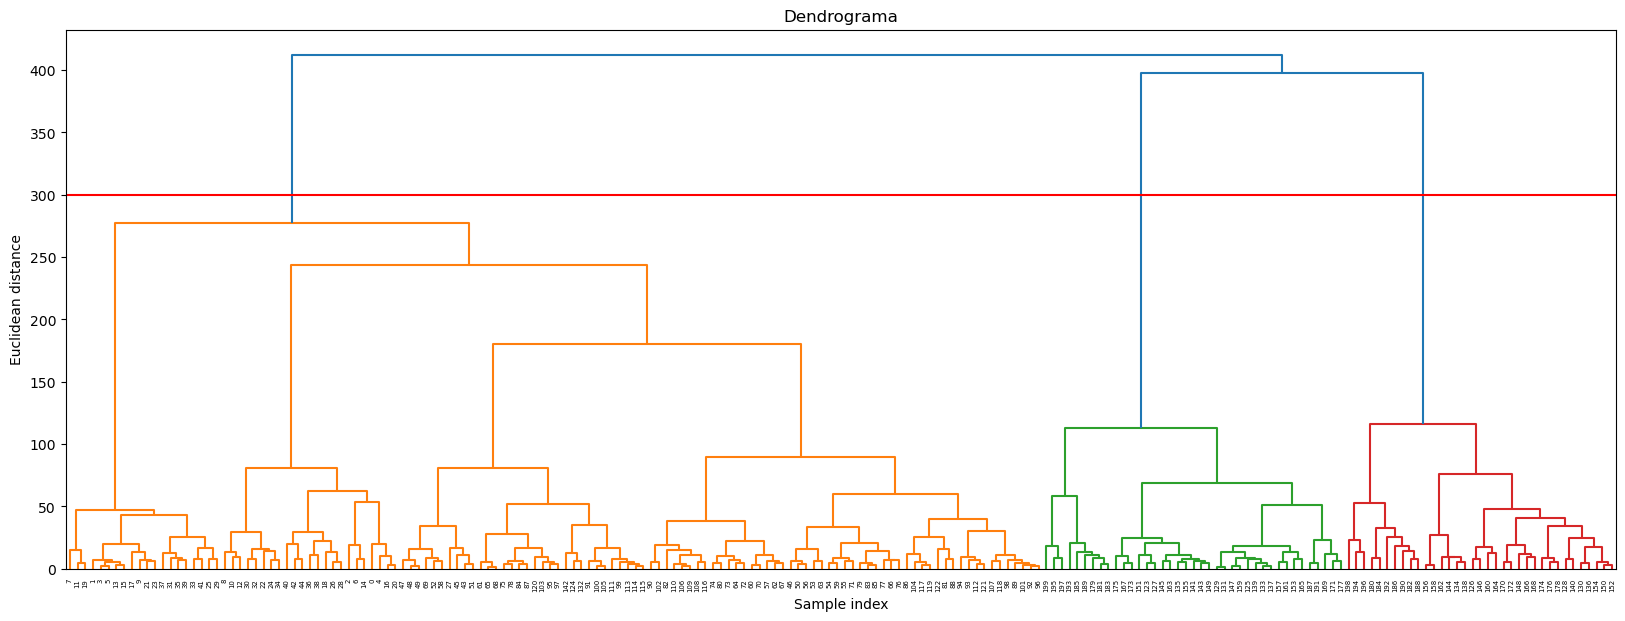

In [41]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 300, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [42]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [48]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

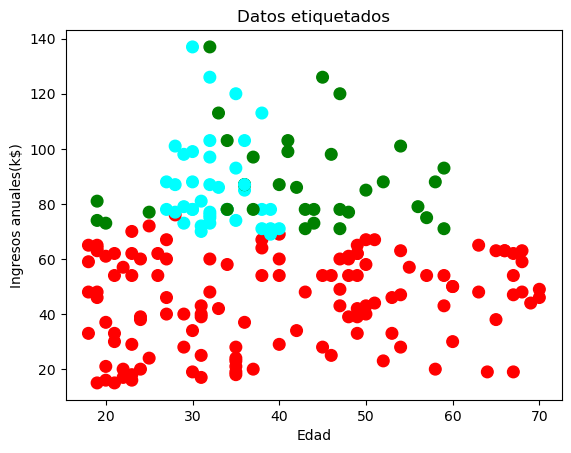

In [52]:
f1 = X['Edad'].values
f2 = X['Ingresos anuales(k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Edad')
plt.ylabel('Ingresos anuales(k$)')
plt.show()

In [53]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

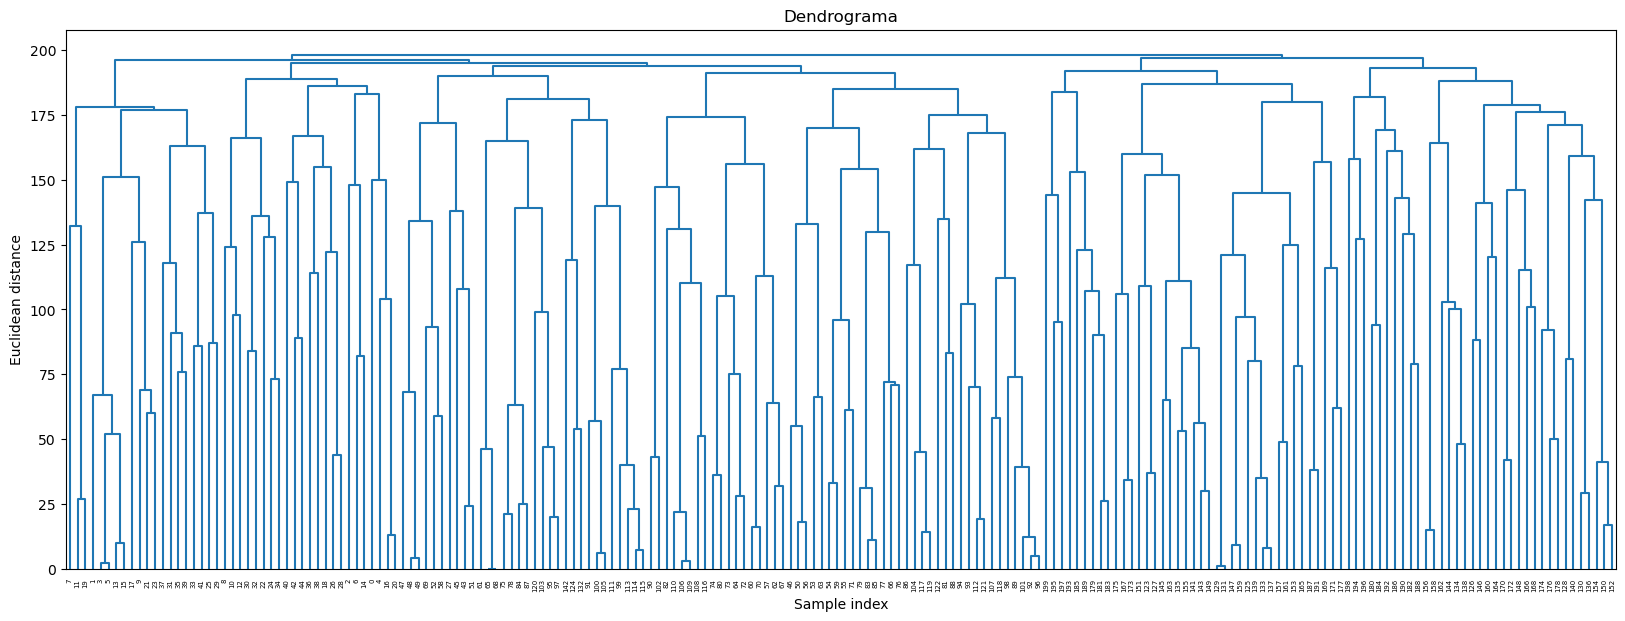

In [54]:
plot_dendrogram(hier_clustering, color_threshold=0)

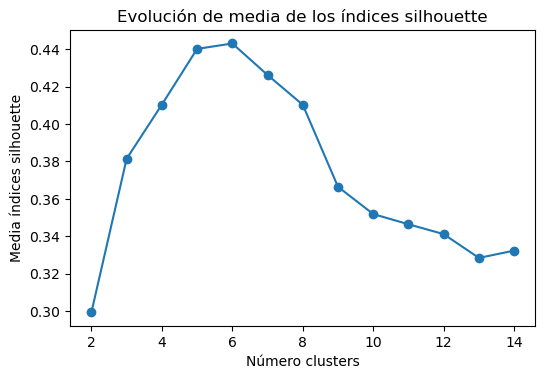

In [55]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [56]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.38141795042544546
Índice de Calinski-Harabasz: 111.4623243273518
Davies-Bouldin Index: 0.8603032525623283


In [57]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.66866802140347, array([277.42153431,  53.60747993, 277.42153431, ..., 397.74740753,
        18.27566688, 397.74740753]))
